## Importing the libraries :-

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
import matplotlib. dates as mdates

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

## Reading the dataset :-

In [2]:
stock_data = pd.read_csv(r"C:\Users\Aaheli Paul\Minor Project - Corizo\1613615-Stock_Price_data_set.csv", na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

In [3]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


### Viewing the shape and checking for Null values :

In [4]:
print("Dataframe shape : ", stock_data.shape)
print("Null value present : ", stock_data.isnull().values.any())

Dataframe shape :  (1009, 6)
Null value present :  False


###### >> There are no null values present in the dataset.

## Plotting the True Adjusted Close Value :-

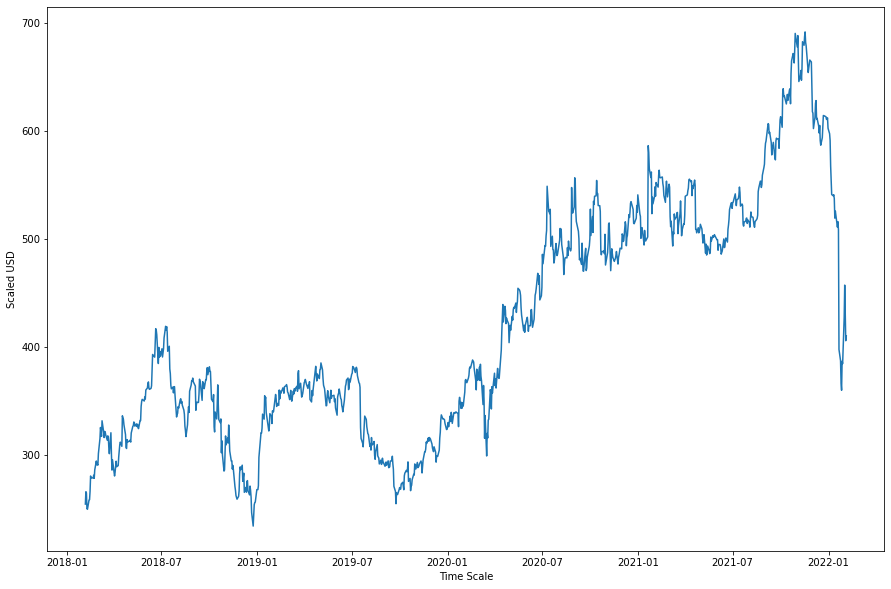

In [5]:
plt.figure(figsize=(15, 10))
x_dates = [d for d in stock_data.index.values]
plt.plot(x_dates, stock_data['Adj Close'], label='Adj Close Value')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.show()

### Setting the target Variable and Selecting the features :

In [6]:
output_var = pd.DataFrame(stock_data['Adj Close'])
features = ['Open', 'High', 'Low', 'Volume']

## Scaling the dataset :-

In [7]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(stock_data[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=stock_data.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2018-02-05,0.061253,0.038304,0.041331,0.186150
2018-02-06,0.030059,0.035640,0.030273,0.198264
2018-02-07,0.071243,0.048408,0.072770,0.135690
2018-02-08,0.072334,0.037683,0.041265,0.141320
2018-02-09,0.043474,0.011436,0.010729,0.272902


## Splitting dataset into Train and Test sets :-

In [8]:
timesplit = TimeSeriesSplit(n_splits = 10)

for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index) : (len(train_index) + len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index) : (len(train_index) + len(test_index))].values.ravel()

### Processing data for LSTM :

In [9]:
train_x = np.array(X_train)
test_x = np.array(X_test)

X_train = train_x.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = test_x.reshape(X_test.shape[0], 1, X_test.shape[1])

## Building LSTM model :-

In [10]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, train_x.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

## Training the model :-
### - for 100 epochs

In [11]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
115/115 [==============================] - 3s 3ms/step - loss: 169539.5312
Epoch 2/100
115/115 [==============================] - 0s 3ms/step - loss: 168016.1094
Epoch 3/100
115/115 [==============================] - 0s 3ms/step - loss: 164686.8906
Epoch 4/100
115/115 [==============================] - 0s 3ms/step - loss: 158956.4062
Epoch 5/100
115/115 [==============================] - 0s 4ms/step - loss: 150854.6406
Epoch 6/100
115/115 [==============================] - 0s 3ms/step - loss: 140832.3125
Epoch 7/100
115/115 [==============================] - 0s 3ms/step - loss: 129464.4062
Epoch 8/100
115/115 [==============================] - 0s 3ms/step - loss: 117287.2578
Epoch 9/100
115/115 [==============================] - 0s 3ms/step - loss: 104753.2266
Epoch 10/100
115/115 [==============================] - 0s 3ms/step - loss: 92233.2500
Epoch 11/100
115/115 [==============================] - 0s 3ms/step - loss: 80030.1406
Epoch 12/100
115/115 [=====================

Epoch 97/100
115/115 [==============================] - 0s 3ms/step - loss: 76.0757
Epoch 98/100
115/115 [==============================] - 0s 3ms/step - loss: 73.9225
Epoch 99/100
115/115 [==============================] - 0s 3ms/step - loss: 71.8369
Epoch 100/100
115/115 [==============================] - 0s 3ms/step - loss: 69.8182


## Prediction using the LSTM model :-

In [12]:
y_pred = lstm.predict(X_test)

### Plotting True Value against Predicted Value :

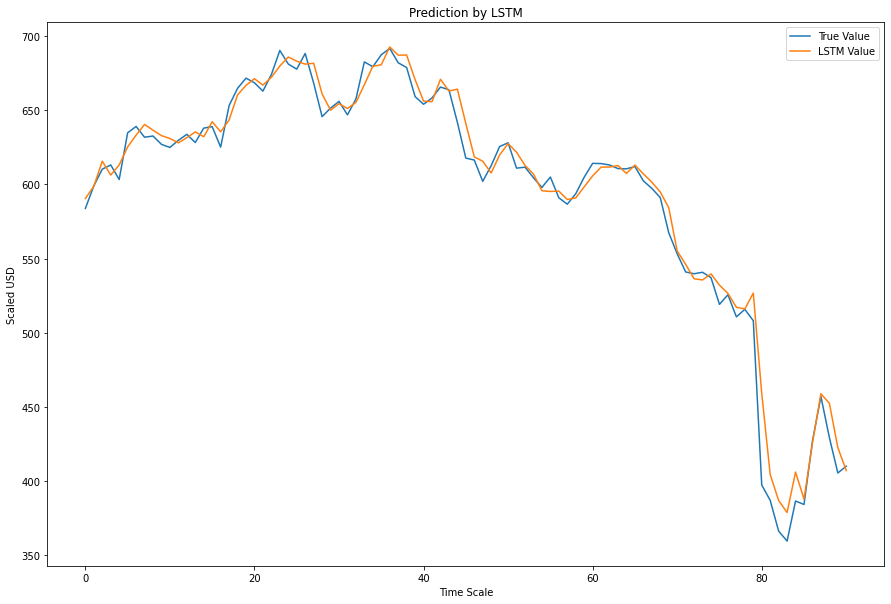

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(y_test, label = 'True Value')
plt.plot(y_pred, label = 'LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

## Conclusion :-
### - more layers can be added to the LSTM model, to increase accuracy in prediction.
### - loss while training the model can be reduced by training it more on bigger datasets.